### Problem statement

- You have been hired as a consultant to a major Automotive Manufacturer and you have been tasked to develop a model to predict the impact of increasing the vehicle horsepower (HP) on fuel economy (Mileage Per Gallon (MPG)). You gathered the data:
- Data set:
    - Independant variable X: Vehicle Horse Power 
    - Dependant variable Y: Mileage Per Gallon (MPG) 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('FuelEconomy.csv')

In [4]:
data.tail()

,Horse Power,Fuel Economy (MPG)
95,162.810542,27.418661
96,266.869640,15.989945
97,243.831211,19.253375
98,140.959803,29.515593
99,184.123053,25.196097


In [5]:
data.describe()

,Horse Power,Fuel Economy (MPG)
count,100.000000,100.000000
mean,213.676190,23.178501
std,62.061726,4.701666
min,50.000000,10.000000
25%,174.996514,20.439516
50%,218.928402,23.143192
75%,251.706476,26.089933
max,350.000000,35.000000


In [6]:
x = data["Horse Power"]
y= data["Fuel Economy (MPG)"]

In [7]:
x.head(5)

0    118.770799
1    176.326567
2    219.262465
3    187.310009
4    218.594340
Name: Horse Power, dtype: float64

In [8]:
y.head(5)

0    29.344195
1    24.695934
2    23.952010
3    23.384546
4    23.426739
Name: Fuel Economy (MPG), dtype: float64

## Correlation


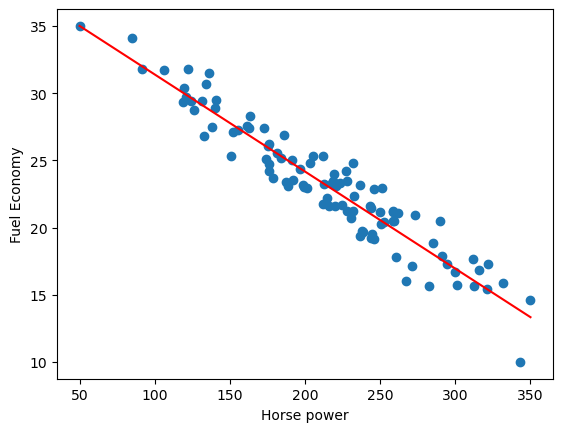

In [9]:
plt.scatter(x, y)
# This will fit the best line into the graph
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))
         (np.unique(x)), color='red')
# Labelling axes
plt.xlabel('Horse power')
plt.ylabel('Fuel Economy')
plt.show()

In [10]:
correlation = y.corr(x)

In [11]:
correlation

-0.9536978230405154

<AxesSubplot:>

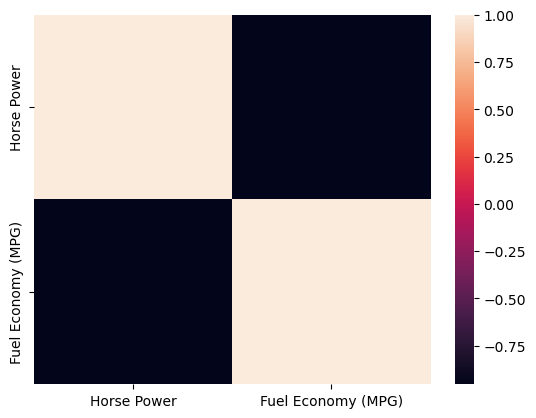

In [12]:
sns.heatmap(data.corr())

In [13]:
plt.show()

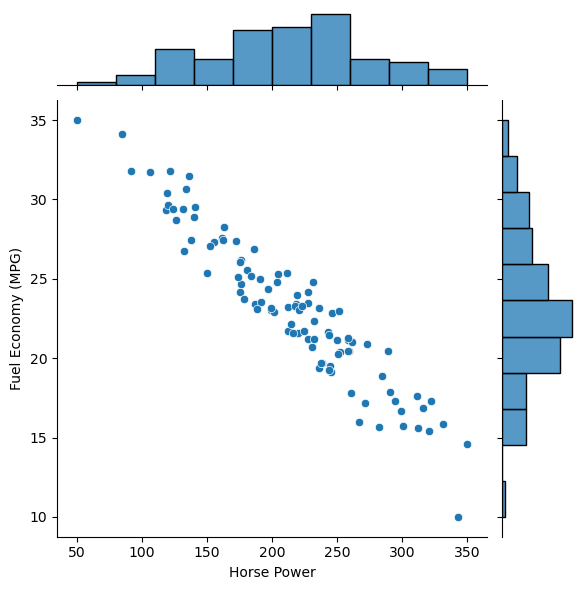

In [14]:
sns.jointplot(x = 'Horse Power', y = 'Fuel Economy (MPG)', data = data)

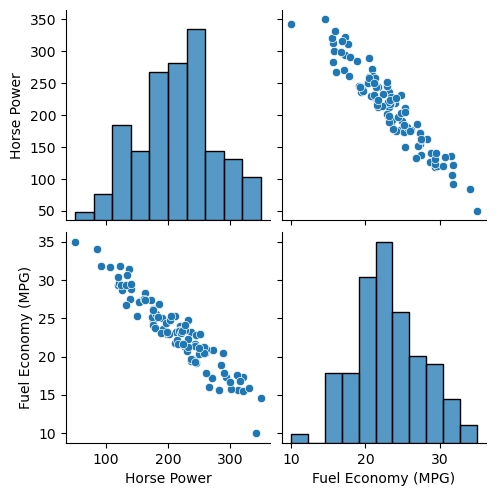

In [15]:
sns.pairplot(data)

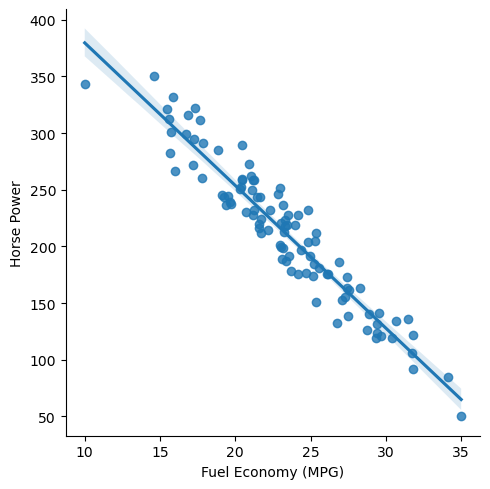

In [16]:
sns.lmplot(x = 'Fuel Economy (MPG)', y =  'Horse Power', data = data)


From the graphs we can see we have a linear correlation between horse power and fuel economy. A linear regression model will be a good idea here.

## Prediction

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y)

In [19]:
X_train.head(5)

99    184.123053
44    227.670465
71    299.530458
58    201.626460
93    131.542116
Name: Horse Power, dtype: float64

In [20]:
X_train.shape

(75,)

In [21]:
Y_train.shape

(75,)

In [22]:
model = LinearRegression().fit(X_train.to_numpy().reshape(-1,1), Y_train)

In [23]:
print('Linear Model Coefficient (m): ', model.coef_)
print('Linear Model Coefficient (b): ', model.intercept_)

Linear Model Coefficient (m):  [-0.07168428]
Linear Model Coefficient (b):  38.44158961687738


In [24]:
model.predict(X_test.to_numpy().reshape(-1,1))

array([21.82123832, 32.37910738, 25.80174689, 23.74295797, 18.18330817,
       15.80244018, 27.52064343, 20.83882326, 20.96946133, 26.87095347,
       25.83676188, 29.87269055, 29.92759062, 28.84858009, 22.80674092,
       22.35978964, 20.41840538, 21.79530973, 16.86073787, 15.37066758,
       26.06575335, 23.23857003, 13.35209221, 19.75533021, 30.82459329])

#### Running linear regression on training set

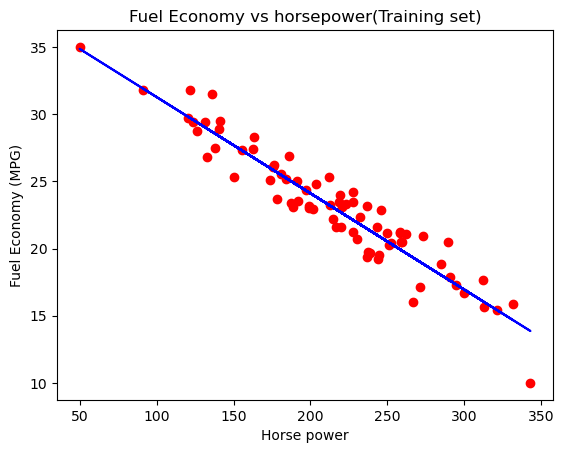

In [25]:
plt.scatter(X_train, Y_train, color = 'red')
plt.plot(X_train, model.predict(X_train.to_numpy().reshape(-1,1)), color = 'blue')
plt.title('Fuel Economy vs horsepower(Training set)')
plt.xlabel('Horse power')
plt.ylabel('Fuel Economy (MPG)')
plt.show()

#### Running linear regression on test set

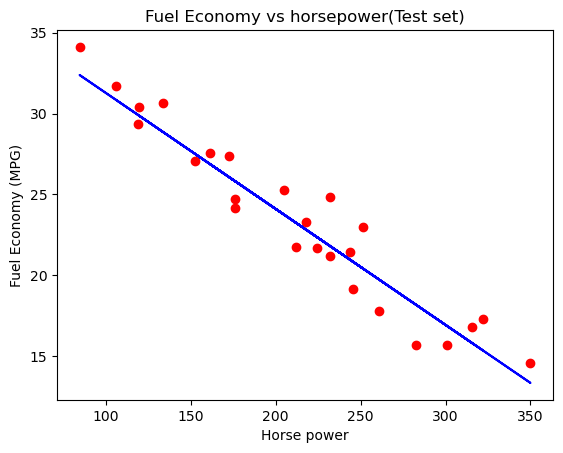

In [31]:
plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_test, model.predict(X_test.to_numpy().reshape(-1,1)), color = 'blue')
plt.title('Fuel Economy vs horsepower(Test set)')
plt.xlabel('Horse power')
plt.ylabel('Fuel Economy (MPG)')
plt.show()

In [27]:
def run_predictions_and_compute_error(model, X_test, Y_test_encoded):
    Y_prediction = model.predict(X_test)
    return mean_squared_error(Y_test_encoded, Y_prediction, squared=False), Y_prediction

In [28]:
rmse, Y_prediction = run_predictions_and_compute_error(model, X_test.to_numpy().reshape(-1,1), Y_test)

In [29]:
r2_score(Y_test,Y_prediction)

0.9215791042318395